# SEIR Model

#### Normal model

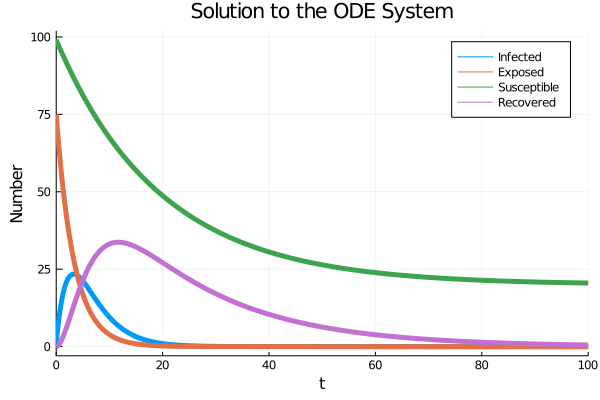

In [3]:
using DifferentialEquations

# Defining the problem
# u[1] - S, Susceptible
# u[2] - E, Exposed
# u[3] - I, Infectious
# u[4] - R, Recovered
# lambda - Birth rate
# mu - Death rate
# beta - expected amount of people an infected person infects per day
# gamma - proportion of infected recovering per day
# a^-1 - average incubation period
# N - total population

lambda = 1.0
mu = 0.05
beta = 0.4
N = 10000
a = 0.25
gamma = 0.25

S0 = 99.0
E0 = 75
I0 = 1
R0 = 0  # note this is not R_0

function seir(du,u,p,t)
    du[1] = lambda - mu*u[1] - (beta*u[3]*u[1])/N
    du[2] = (beta*u[3]*u[1])/N - (mu+a)*u[2]
    du[3] = a*u[2] - (gamma+mu)*u[3]
    du[4] = gamma*u[3] - mu*u[4]
end

# Finding the solution
u0 = [S0, E0, I0, R0]
p = [lambda,mu,beta,N,a,gamma]
tspan = (0.0,100.0)
prob = ODEProblem(seir,u0,tspan,p)
sol = solve(prob)

# Plotting the solution
using Plots
plot(sol,vars=3,linewidth=5,title="Solution to the ODE System",
xaxis="Time (t)",yaxis="Number", label="Infected")
plot!(sol,vars=2,linewidth=5, label="Exposed")
plot!(sol,vars=1,linewidth=5, label="Susceptible")
plot!(sol,vars=4,linewidth=5, label="Recovered")

#### Reaction system model

In [4]:
# empty -> S,  lambda
# S -> empty,  mu
# S + I -> I + E, beta
# E -> empty, mu
# E -> I, a
# I -> empty, mu
# I -> R, gamma,
# R -> empty, mu

lambda = 1.0
mu = 0.05
beta = 0.4
N = 10000
a = 0.25
gamma = 0.25

S0 = 99.0
E0 = 75
I0 = 1
R0 = 0 

using Catalyst, Plots, DifferentialEquations
rs = @reaction_network begin
  lambda, 0 --> S
  mu, S --> 0
  beta/N, S + I --> I + E
  mu, E --> 0
  a, E --> I
  mu, I --> 0
  gamma, I --> R
  mu, R --> 0
end lambda mu beta N a gamma
tspan = (0.,100.)
u0 = [S0, I0, E0, R0]
p = [lambda,mu,beta,N,a,gamma]

### Stochastic Model:
dprob = DiscreteProblem(rs, u0, tspan, p)
jprob = JumpProblem(rs, dprob, Direct())
sol = solve(jprob, SSAStepper())

plot(sol,lw=5,xaxis="Time (t)",yaxis="Number",
title="SEIR Model - 'Reaction System'")